In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import altair as alt
alt.renderers.enable('notebook')
import plotly 

In [2]:
url = 'https://raw.githubusercontent.com/BrianBehnke/Week5-NFL-Salary-Project/master/NFLdataExtract2.csv'
nfl_data=pd.read_csv(url)
nfl_data.head()

,Number of Records,Passing TDs,Player,Position,Pts,Salary,Team,Points
0,1,0,A.J. Derby,TE,12,705000,2TM,12
1,1,0,A.J. Green,WR,48,10550000,CIN,48
2,1,0,Aaron Jones,RB,24,489706,GNB,24
3,1,0,Adam Humphries,WR,6,2914000,TAM,6
4,1,0,Adam Shaheen,TE,18,733661,CHI,18


In [3]:
nfl_data.shape

(408, 8)

In [4]:
nfl_data.describe()

,Number of Records,Passing TDs,Pts,Salary,Points
count,408.0,408.000000,408.000000,4.080000e+02,408.000000
mean,1.0,1.041667,24.254902,2.411662e+06,30.504902
std,0.0,4.625082,29.065016,3.137377e+06,38.841390
min,1.0,0.000000,1.000000,1.216000e+05,1.000000
25%,1.0,0.000000,6.000000,6.375000e+05,6.000000
50%,1.0,0.000000,12.000000,1.000000e+06,12.000000
75%,1.0,0.000000,30.000000,2.517500e+06,36.000000
max,1.0,34.000000,158.000000,2.250000e+07,222.000000


In [5]:
nfl_data.sample(10)

,Number of Records,Passing TDs,Player,Position,Pts,Salary,Team,Points
221,1,0,Jordan Matthews,WR,6,697059,BUF,6
148,1,0,Elijhaa Penny,RB,12,129200,ARI,12
171,1,0,Isaiah Crowell,RB,14,1000000,CLE,14
371,1,0,Tevin Coleman,RB,48,791628,ATL,48
262,1,0,Lance Kendricks,TE,6,1250000,GNB,6
108,1,0,David Morgan,TE,6,630000,MIN,6
268,1,0,Leonard Fournette,RB,60,1699129,JAX,60
35,1,0,Barry Church,DB,6,4500000,JAX,6
23,1,0,Ameer Abdullah,RB,30,876745,DET,30
300,1,0,Michael Thomas,WR,30,915361,NOR,30


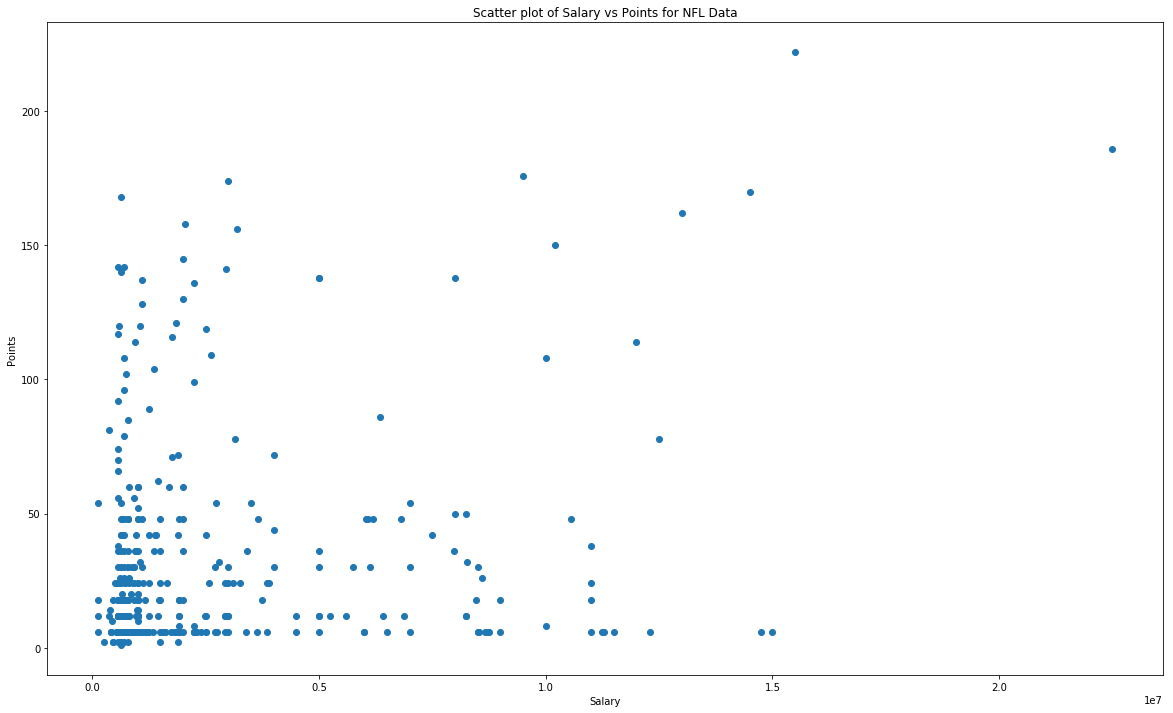

In [6]:
fig, ax1 = plt.subplots(figsize=(20, 12))
plt.title('Scatter plot of Salary vs Points for NFL Data')
plt.xlabel('Salary')
plt.ylabel('Points')
plt.scatter(nfl_data['Salary'], nfl_data['Points'])
#plt.yscale('log')
plt.show()

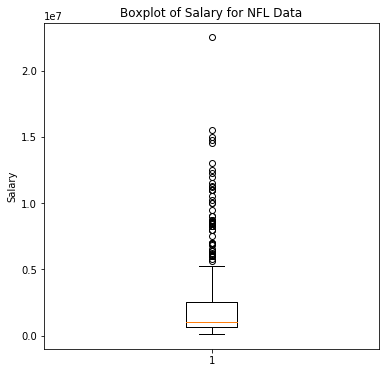

In [7]:
# That looks much nicer than the pie chart
# Lets try a box plot
fig, ax1 = plt.subplots(figsize=(6, 6))
plt.title('Boxplot of Salary for NFL Data')
plt.ylabel('Salary')

plt.boxplot(nfl_data['Salary'])
plt.show()

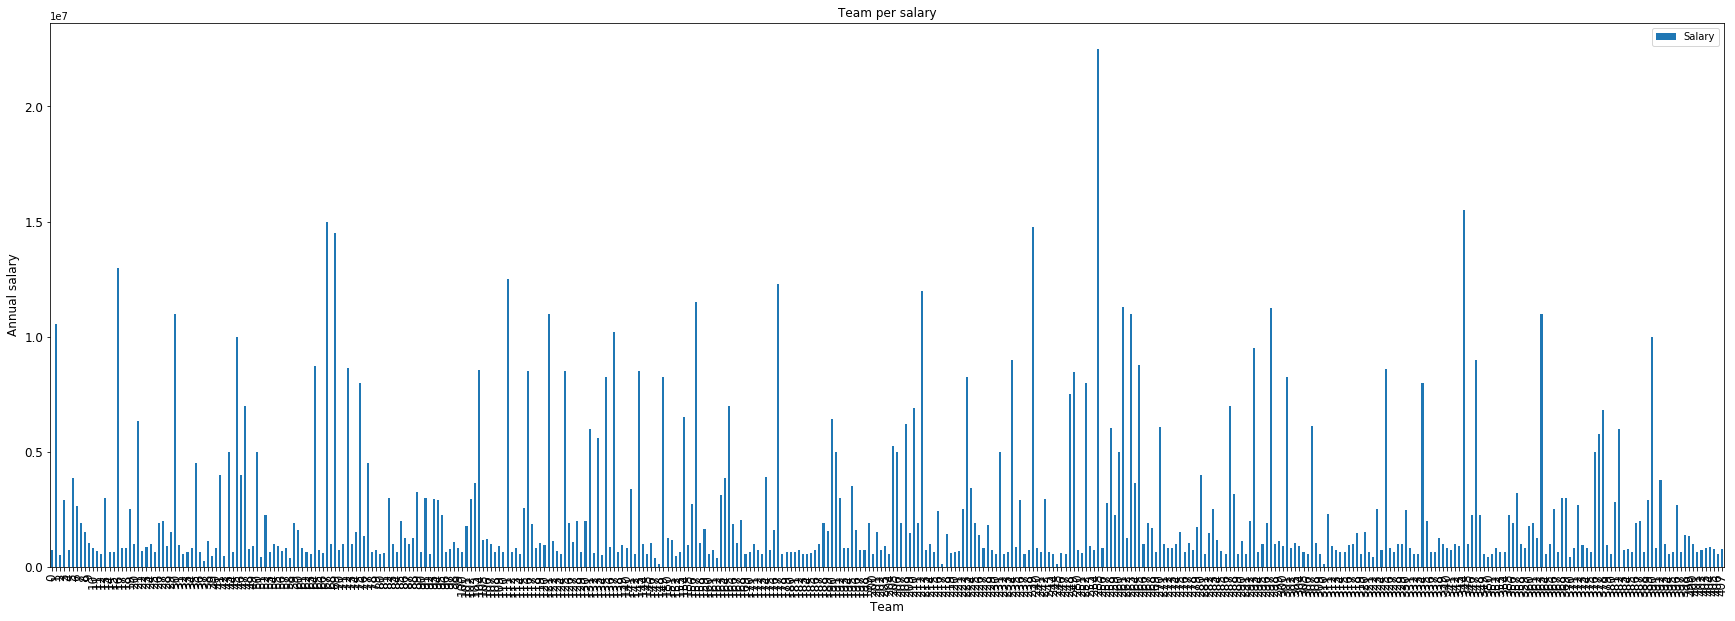

In [8]:
ax = nfl_data[['Team','Salary']].plot(kind='bar', title ="Team per salary", figsize=(30, 10), legend=True, fontsize=12)
ax.set_xlabel("Team", fontsize=12)
ax.set_ylabel("Annual salary", fontsize=12)
#plt.yscale('log')
plt.show()

In [9]:
nfl_scorers = nfl_data.loc[nfl_data['Points'] >= 10]
nfl_scorers.head().T

,0,1,2,4,5
Number of Records,1,1,1,1,1
Passing TDs,0,0,0,0,0
Player,A.J. Derby,A.J. Green,Aaron Jones,Adam Shaheen,Adam Thielen
Position,TE,WR,RB,TE,WR
Pts,12,48,24,18,24
Salary,705000,10550000,489706,733661,3850000
Team,2TM,CIN,GNB,CHI,MIN
Points,12,48,24,18,24


In [10]:
nfl_scorers.describe()

,Number of Records,Passing TDs,Pts,Salary,Points
count,252.0,252.000000,252.000000,2.520000e+02,252.000000
mean,1.0,1.686508,35.710317,2.557923e+06,45.829365
std,0.0,5.796081,32.007709,3.197059e+06,42.765816
min,1.0,0.000000,2.000000,1.216000e+05,10.000000
25%,1.0,0.000000,12.000000,7.050000e+05,18.000000
50%,1.0,0.000000,24.000000,1.000000e+06,30.000000
75%,1.0,0.000000,48.000000,2.964388e+06,54.000000
max,1.0,34.000000,158.000000,2.250000e+07,222.000000


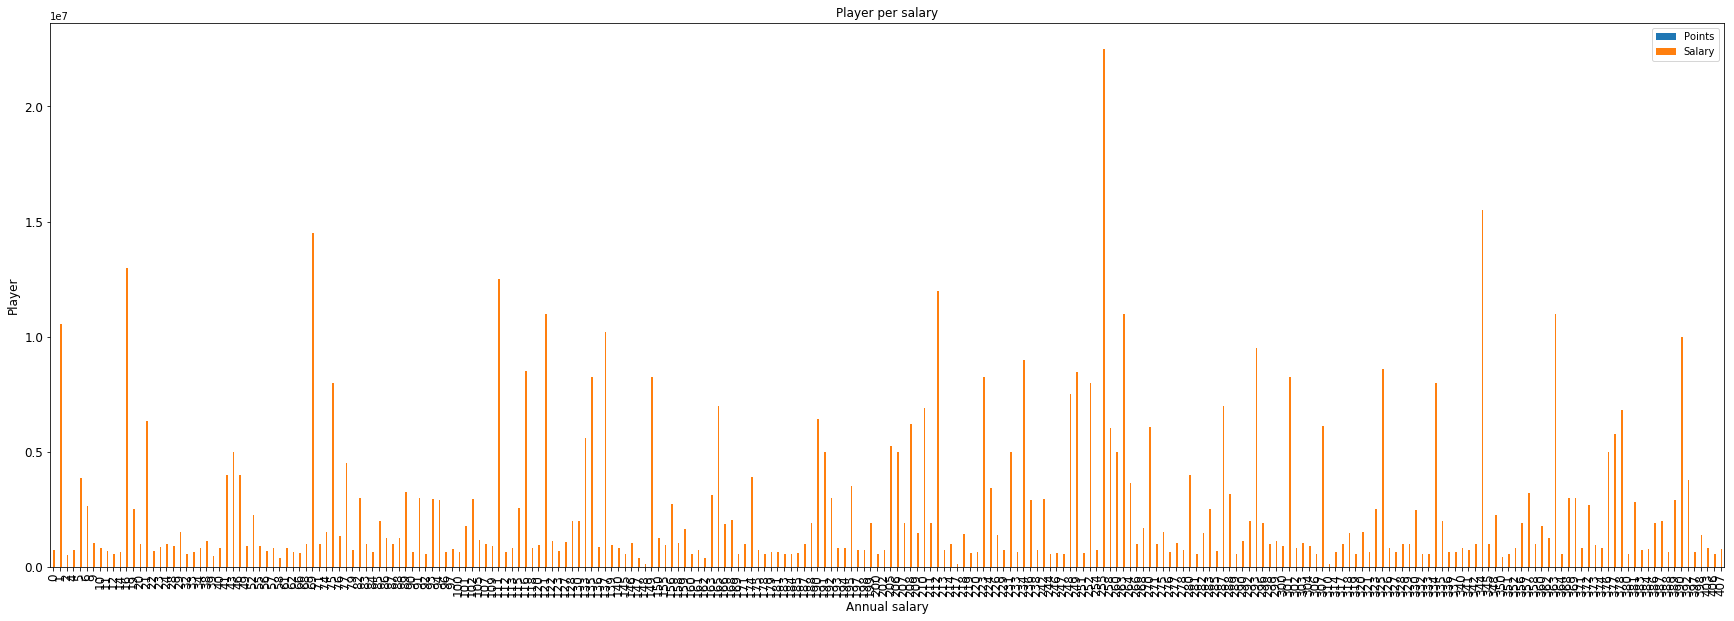

In [11]:
ax = nfl_scorers[['Points','Salary']].plot(kind='bar', title ="Player per salary", figsize=(30, 10), legend=True, fontsize=12)
ax.set_ylabel("Player", fontsize=12)
ax.set_xlabel("Annual salary", fontsize=12)
#plt.yscale('log')
plt.show()

In [12]:
nfl_scorers.head()

,Number of Records,Passing TDs,Player,Position,Pts,Salary,Team,Points
0,1,0,A.J. Derby,TE,12,705000,2TM,12
1,1,0,A.J. Green,WR,48,10550000,CIN,48
2,1,0,Aaron Jones,RB,24,489706,GNB,24
4,1,0,Adam Shaheen,TE,18,733661,CHI,18
5,1,0,Adam Thielen,WR,24,3850000,MIN,24


In [13]:
nfl_scorers = nfl_scorers.drop('Number of Records', axis=1)
nfl_scorers = nfl_scorers.drop('Passing TDs', axis=1)
nfl_scorers = nfl_scorers.drop('Pts', axis=1)


In [14]:
nfl_scorers.head()

,Player,Position,Salary,Team,Points
0,A.J. Derby,TE,705000,2TM,12
1,A.J. Green,WR,10550000,CIN,48
2,Aaron Jones,RB,489706,GNB,24
4,Adam Shaheen,TE,733661,CHI,18
5,Adam Thielen,WR,3850000,MIN,24


In [15]:
nfl_scorers.describe()

,Salary,Points
count,2.520000e+02,252.000000
mean,2.557923e+06,45.829365
std,3.197059e+06,42.765816
min,1.216000e+05,10.000000
25%,7.050000e+05,18.000000
50%,1.000000e+06,30.000000
75%,2.964388e+06,54.000000
max,2.250000e+07,222.000000


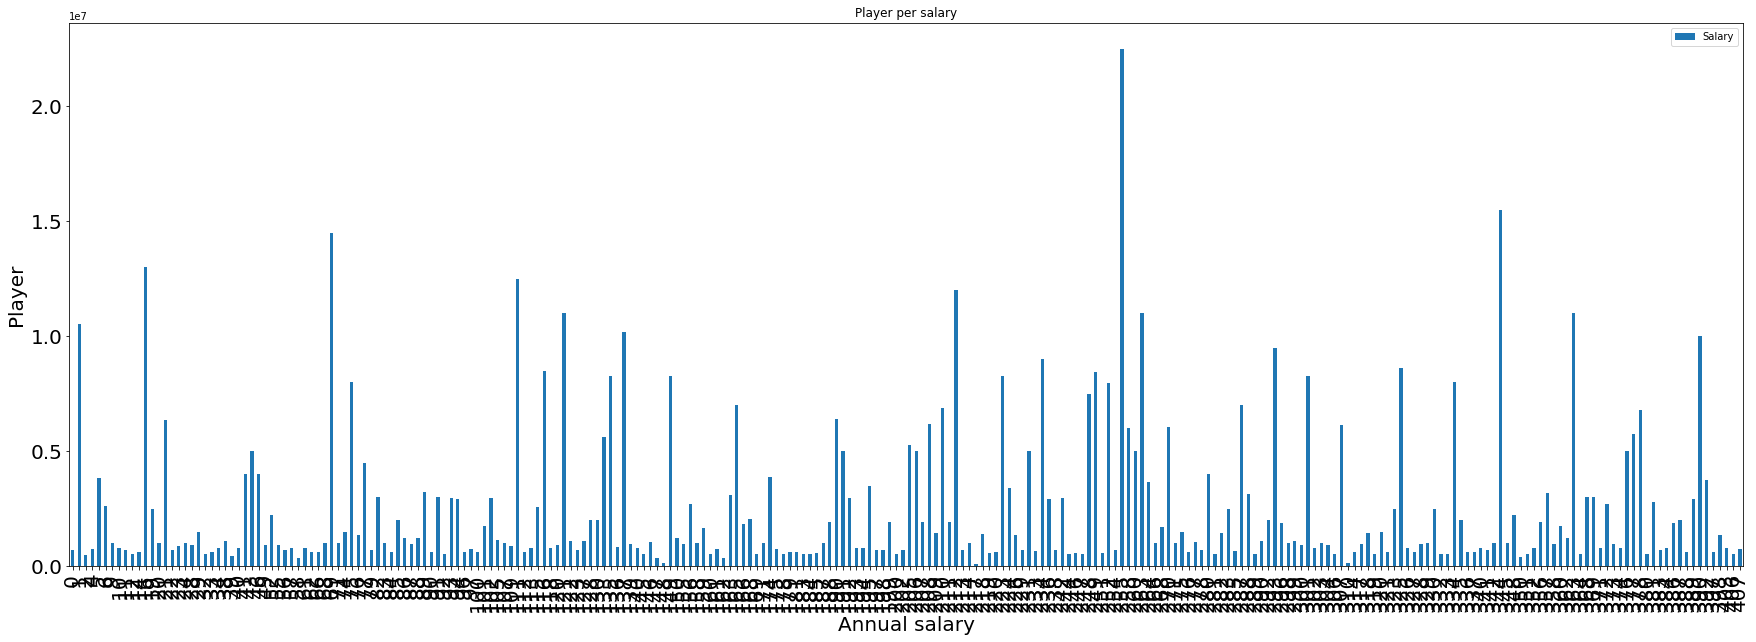

In [16]:
ax = nfl_scorers[['Player','Salary']].plot(kind='bar', title ="Player per salary", figsize=(30, 10), fontsize=20)
ax.set_ylabel("Player", fontsize=20)
ax.set_xlabel("Annual salary", fontsize=20)
plt.show()

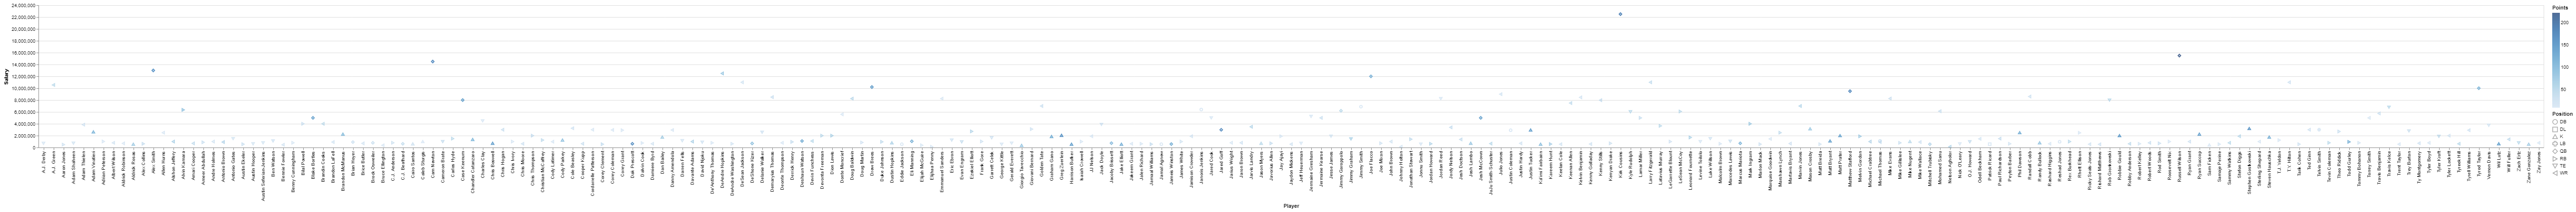

In [17]:
alt.Chart(nfl_scorers).mark_point().encode(
    x='Player',
    y='Salary',
    color='Points',
    shape='Position'
)

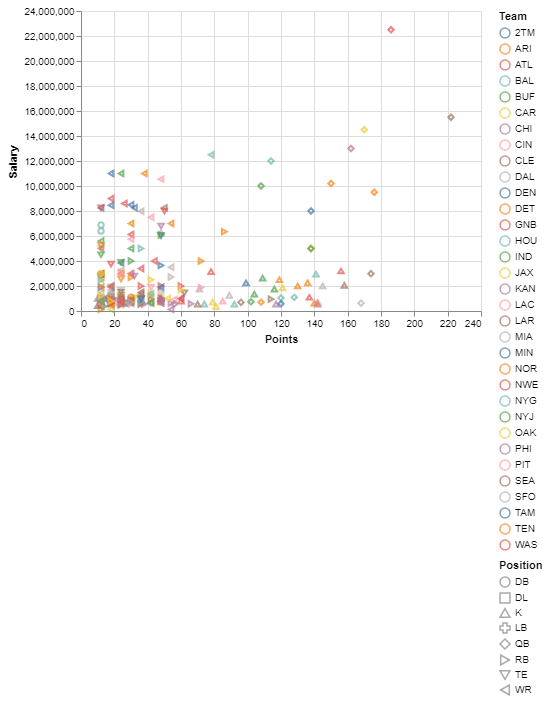

In [18]:
alt.Chart(nfl_scorers).mark_point().encode(
    x='Points',
    y='Salary',
    color='Team',
    shape='Position'
)

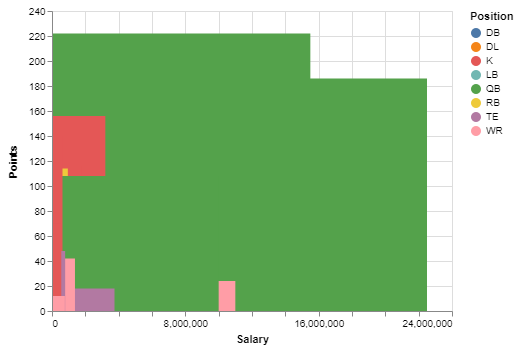

In [19]:
alt.Chart(nfl_scorers).mark_rect().encode(
    x='Salary',
    y='Points',
    color='Position'
)

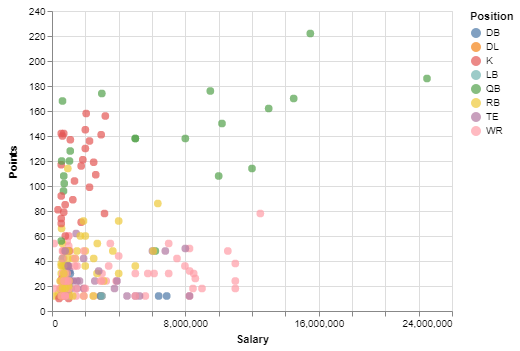

In [20]:
alt.Chart(nfl_scorers).mark_circle(size=60).encode(
    x='Salary',
    y='Points',
    color='Position',
    tooltip=['Player', 'Salary', 'Points', 'Position']
).interactive()

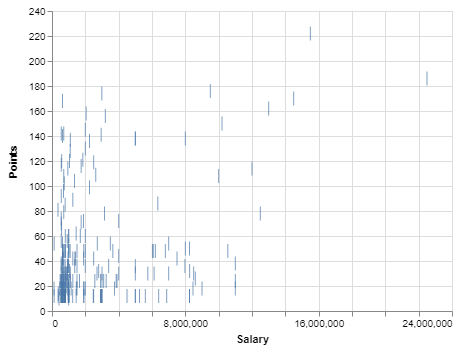

In [21]:
alt.Chart(nfl_scorers).mark_tick().encode(
    x='Salary',
    y='Points'
)

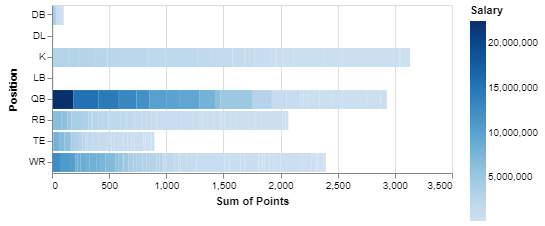

In [22]:
alt.Chart(nfl_scorers).mark_bar().encode(
    x='sum(Points)',
    y='Position',
    color='Salary'
)

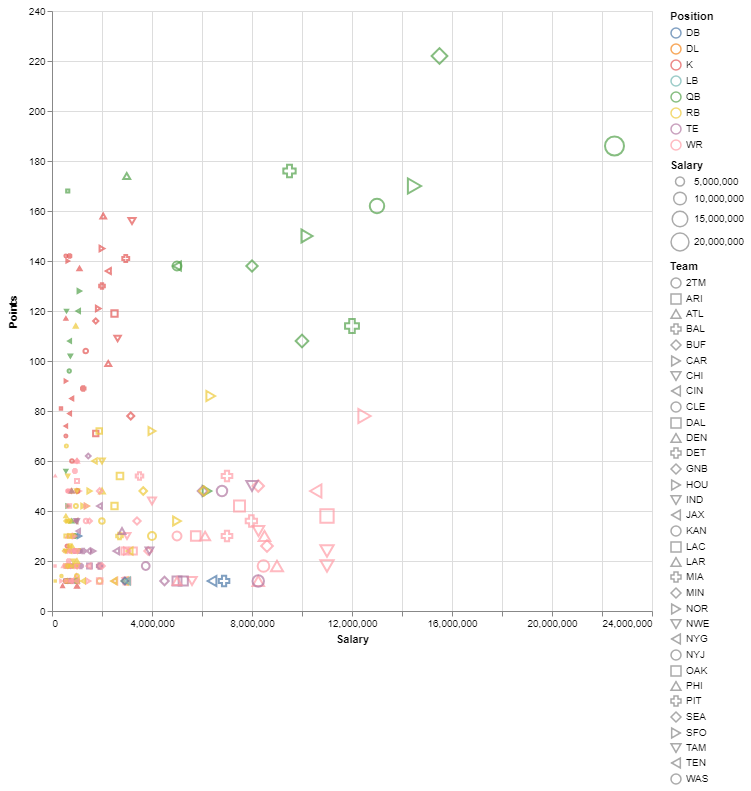

In [23]:
alt.Chart(nfl_scorers).mark_point().encode(
    alt.X('Salary', scale=alt.Scale(zero=False)),
    alt.Y('Points', scale=alt.Scale(zero=False, padding=1)),
    color='Position',
    size='Salary',
    shape='Team',
    tooltip=['Player', 'Team', 'Salary', 'Points', 'Position']
).configure_view(height=600, width=600).interactive()

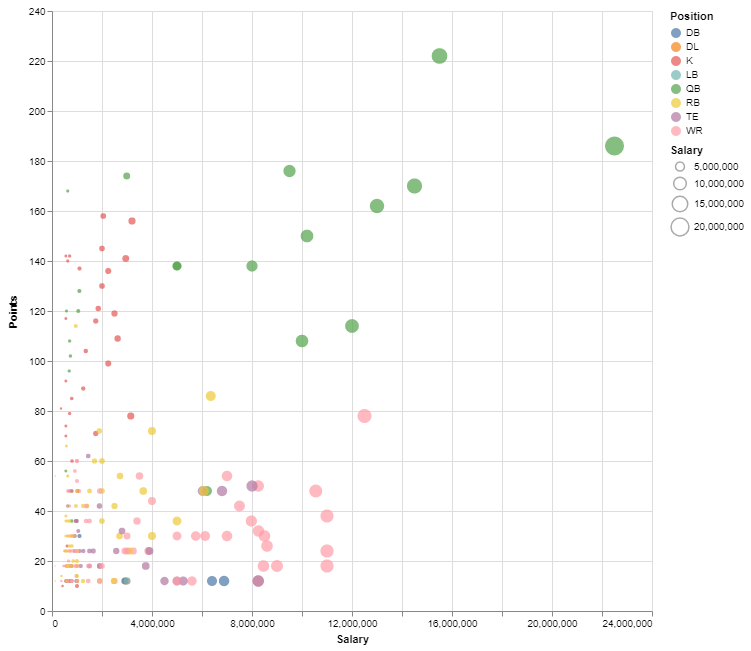

In [24]:
alt.Chart(nfl_scorers).mark_circle().encode(
    alt.X('Salary', scale=alt.Scale(zero=True)),
    alt.Y('Points', scale=alt.Scale(zero=True, padding=1)),
    color='Position',
    size='Salary',
    tooltip=['Player', 'Salary', 'Points', 'Position']
).interactive().configure_view(height=600, width=600)

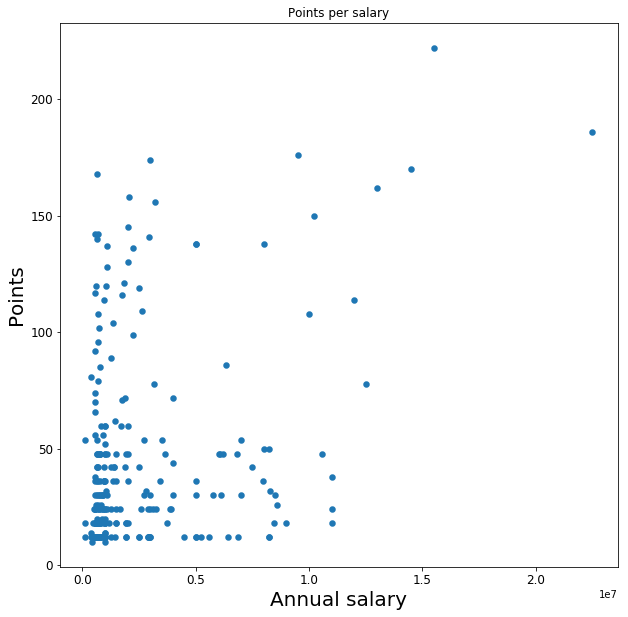

In [25]:
# Looking at chart in matplotlib
import seaborn as sns
ax = nfl_scorers[['Salary','Points']].plot(kind='scatter', 
                                           x='Salary', 
                                           y='Points', 
                                           title ="Points per salary",
                                                                                  
                                           linewidth=2,
                                           fontsize=12,
                                           figsize=(10, 10))
ax.set_ylabel("Points", fontsize=20)
ax.set_xlabel("Annual salary", fontsize=20)
plt.show()

In [26]:
# test cell


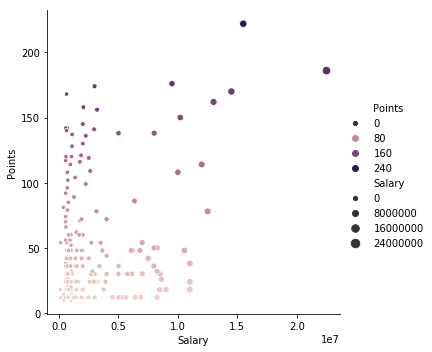

In [27]:
# Looking at chart in seaborn
sns.relplot(x='Salary', y='Points', hue='Points', size='Salary', data=nfl_scorers);

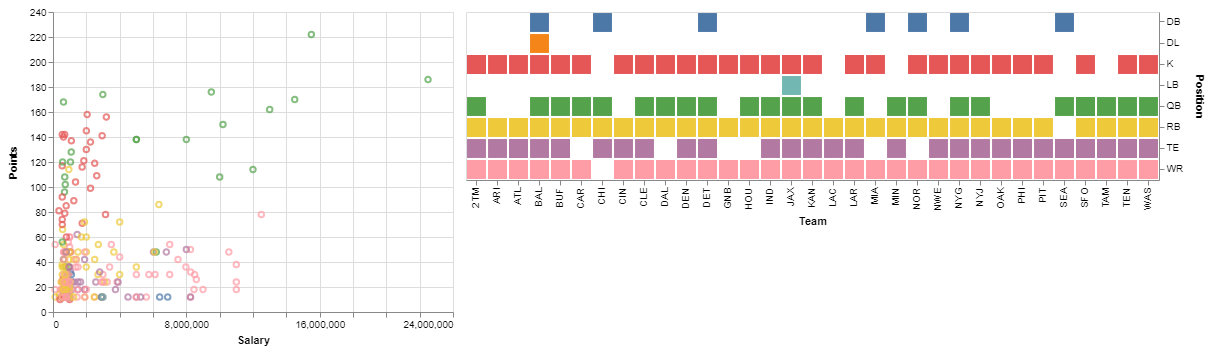

In [28]:
selection = alt.selection_multi(fields=['Position', 'Team'])
color = alt.condition(selection,
                      alt.Color('Position:N', legend=None),
                      alt.value('lightgray'))

scatter = alt.Chart(nfl_scorers).mark_point().encode(
    x='Salary:Q',
    y='Points:Q',
    color=color,
    tooltip='Player'
)

legend = alt.Chart(nfl_scorers).mark_rect().encode(
    y=alt.Y('Position:N', axis=alt.Axis(orient='right')),
    x='Team',
    color=color
).add_selection(
    selection
)

scatter | legend

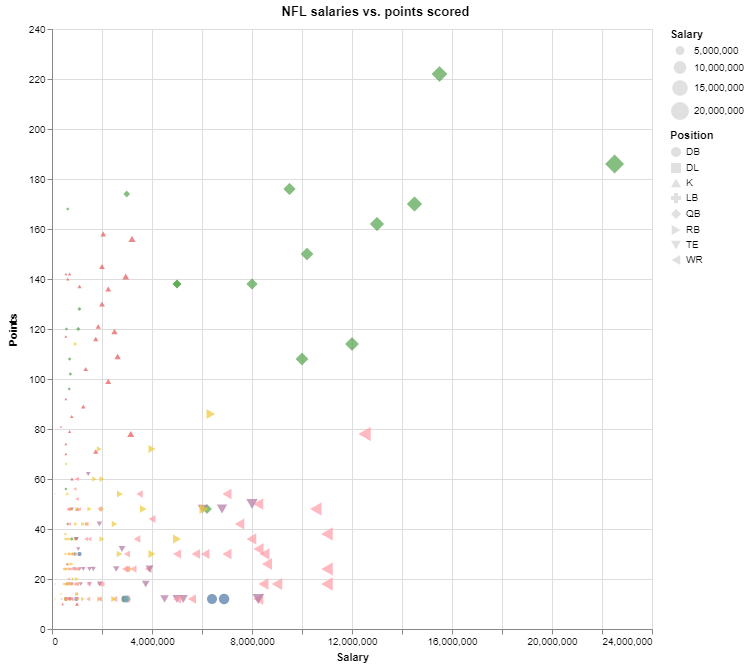

In [198]:
input_dropdown = alt.binding_select(options=['QB','RB','WR', 'K', 'DB', 'DL', 'TE', 'LB'])
selection = alt.selection_single(fields=['Position'], bind=input_dropdown, name='Player ')
color = alt.condition(selection,
                    alt.Color('Position:N', legend=None),
                    alt.value('lightgray'))

myChart = alt.Chart(nfl_scorers).mark_point(filled=True).encode(
    x='Salary:Q',
    y='Points:Q',
    color=color,
    tooltip=('Player', 'Salary', 'Team', 'Position'),
    size='Salary',
    shape='Position'
).add_selection(
    selection
).configure_view(height=600, width=600).properties(title="NFL salaries vs. points scored")
myChart
#myChart.save(fp='chart.json')
#myChart.save('chart.html')


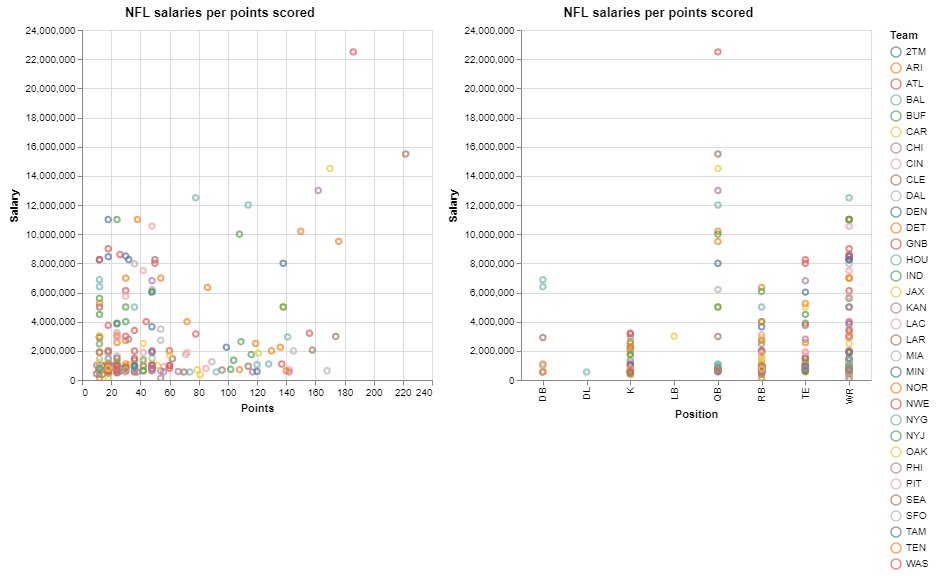

In [62]:
brush = alt.selection(type='interval', resolve='global')

base = alt.Chart(nfl_scorers).mark_point().encode(
    y='Salary',
    color=alt.condition(brush, 'Team', alt.ColorValue('gray'))
).add_selection(
    brush
).properties(
    width=350,
    height=350
).interactive()

base.encode(x='Points') | base.encode(x='Position')

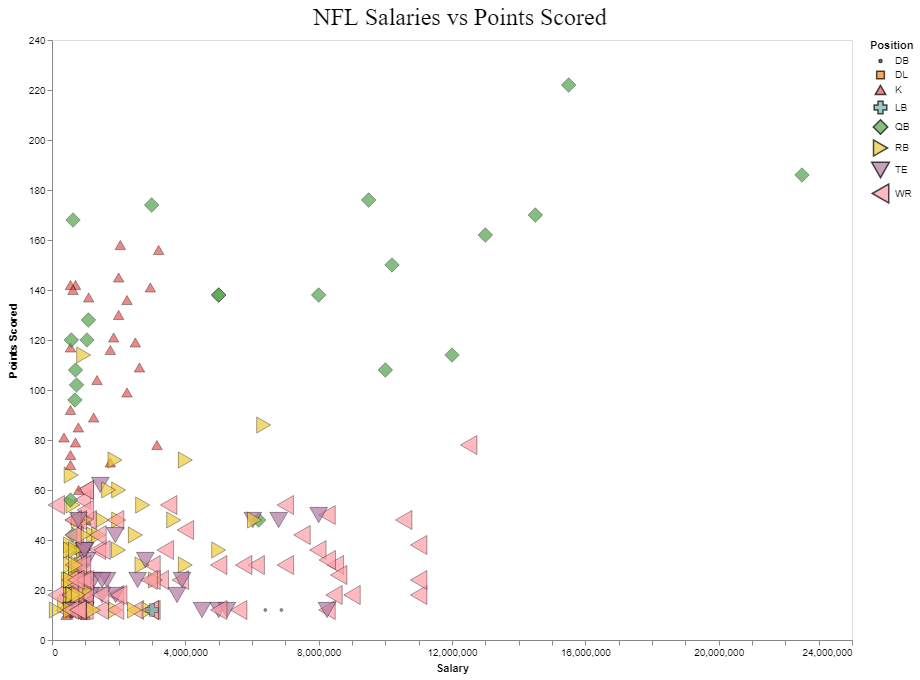

In [236]:
input_dropdown = alt.binding_select(options=['QB','RB','WR', 'K', 'DB', 'DL', 'TE', 'LB'])
selection = alt.selection_single(fields=['Position'], bind=input_dropdown, name='Player')
color = alt.condition(selection,
                    alt.Color('Position:N', scale=alt.Scale(scheme='tableau10')),
                    alt.value('lightgray'))
sizes = alt.Size('Position',scale=alt.Scale(zero=False))
title_str = "NFL Salaries vs Points Scored"

myChart2 = alt.Chart(nfl_scorers).mark_point(filled=True, stroke="black", strokeWidth=.5

).encode(
    alt.X('Salary:Q',scale=alt.Scale(zero=False), 
          axis=alt.Axis(title='Salary', grid=False)),
    alt.Y('Points:Q',axis=alt.Axis(title='Points Scored', grid=False)),

    color=color,
    tooltip=('Player', 'Salary', 'Team', 'Position'),
    size=sizes,
    
    shape='Position'

).add_selection(selection
                                
).properties(title=alt.TitleParams(text=title_str), height=600, width=800
             
).configure(
    title = alt.VgTitleConfig(
        font = 'Times New Roman',
        fontSize=24,
        fontWeight = 500)                                                                                                        
)

myChart2

In [134]:
alt.Chart.mark_point??